<a href="https://colab.research.google.com/github/varshithavijayakrishna/gui_parkinson_model/blob/main/March_10_test2_voice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

file_path = "/content/Demographics_age_sex.xlsx"  # Make sure this is the correct path
df = pd.read_excel(file_path)  # Use read_excel instead of read_csv
df.head()


,Sample ID,Label,Age,Sex
0,AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5,HC,69.0,M
1,AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6,HC,43.0,M
2,AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2,HC,18.0,F
3,AH_123G_559F0706-2238-447C-BA39-DB5933BA619D,HC,28.0,M
4,AH_195B_39DA6A45-F4CC-492A-80D4-FB79049ACC22,HC,68.0,M


In [8]:
print(df.isnull().sum())


Sample ID    0
Label        0
Age          0
Sex          0
dtype: int64


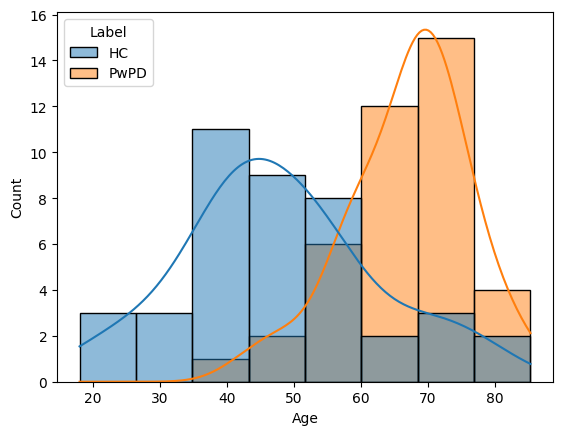

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df, x="Age", hue="Label", kde=True)
plt.show()


In [10]:
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})  # Convert Male/Female to 0/1
df['Label'] = df['Label'].map({'HC': 0, 'PD': 1})  # Convert Healthy/Parkinson's to 0/1


In [11]:
import zipfile
import os

zip_path = "/content/HC_AH.zip"  # Replace with your actual zip file name

# List contents
with zipfile.ZipFile(zip_path, 'r') as z:
    z.printdir()


File Name                                             Modified             Size
HC_AH/AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6.wav 2022-11-01 12:16:22        72636
HC_AH/AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2.wav 2022-11-01 12:16:22        91844
HC_AH/AH_222K_FC9D2763-1836-460B-954F-37F23D6CD81D.wav 2022-11-01 12:16:22        61720
HC_AH/AH_123G_559F0706-2238-447C-BA39-DB5933BA619D.wav 2022-11-01 12:16:22        91712
HC_AH/AH_264Z_593C20CD-0A54-4177-B031-26EE147080A3.wav 2022-11-01 12:16:22       133360
HC_AH/AH_195B_39DA6A45-F4CC-492A-80D4-FB79049ACC22.wav 2022-11-01 12:16:22       134816
HC_AH/AH_197T_7552379A-2310-46E1-9466-9D8045C990B8.wav 2022-11-01 12:16:22       107500
HC_AH/AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5.wav 2022-11-01 12:16:22       119724
HC_AH/AH_292J_201CB911-31C1-4CD0-BD73-4FBA4A16C21F.wav 2022-11-01 12:16:22        60336
HC_AH/AH_322A_C3BF5535-A11E-498E-94EB-BE7E74099FFB.wav 2022-11-01 12:16:22       134748
HC_AH/AH_325A_3EB21DC7-C340-4D0E-AC9E-0E

In [12]:
import zipfile
import os

zip_path = "/content/PD_AH.zip"  # Replace with your actual zip file name

# List contents
with zipfile.ZipFile(zip_path, 'r') as z:
    z.printdir()

File Name                                             Modified             Size
PD_AH/AH_545622718-C052AD58-5E6B-4ADC-855C-F76B66BAFA6E.wav 2022-11-01 12:15:58        54804
PD_AH/AH_545622722-3C79DA68-36BB-43A2-B29C-61AEF480E07E.wav 2022-11-01 12:15:58       152532
PD_AH/AH_545622720-E1486AF6-8C95-47EB-829B-4D62698C987A.wav 2022-11-01 12:15:58       117916
PD_AH/AH_545622719-52C23861-6E0D-41E0-A3D8-9358C28C019B.wav 2022-11-01 12:15:58       175572
PD_AH/AH_545622717-461DFFFE-54AF-42AF-BA78-528BD505D624.wav 2022-11-01 12:15:58        96984
PD_AH/AH_545643618-82A143AC-B643-4273-A923-C42A83AEEC5F.wav 2022-11-01 12:15:58       114280
PD_AH/AH_545616858-3A749CBC-3FEB-4D35-820E-E45C3E5B9B6A.wav 2022-11-01 12:15:58       175692
PD_AH/AH_545629296-C2C009C6-8C17-42EA-B6BE-362942FC4692.wav 2022-11-01 12:15:58       128324
PD_AH/AH_545648867-CB17D873-1CEA-492A-B5B0-93C7463F516C.wav 2022-11-01 12:15:58        71200
PD_AH/AH_545692309-EA8C4DC0-9B2A-4CC7-A490-851A2129A733.wav 2022-11-01 12:15:58    

In [24]:
import zipfile
import os

zip_files = ["/content/HC_AH.zip", "/content/PD_AH.zip"]  # Update paths if needed
extract_path = "data/audio_files/"

os.makedirs(extract_path, exist_ok=True)  # Ensure the directory exists

for zip_file in zip_files:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

print("✅ Extraction complete!")  # Fixed indentation


✅ Extraction complete!


In [25]:
import os

extract_path = "data/audio_files/"

# List the extracted files and folders
print("Extracted contents:", os.listdir(extract_path))


Extracted contents: ['PD_AH', 'HC_AH']


In [26]:
audio_dirs = ["data/audio_files/HC_AH", "data/audio_files/PD_AH"]


In [27]:
import os
import librosa
import numpy as np
import pandas as pd

# List of directories
audio_dirs = ["data/audio_files/HC_AH", "data/audio_files/PD_AH"]

# Initialize empty list for features
features = []

# Process files from both directories
for audio_dir in audio_dirs:
    for filename in os.listdir(audio_dir):
        if filename.endswith(".wav"):  # Ensure it's a .wav file
            filepath = os.path.join(audio_dir, filename)
            y, sr = librosa.load(filepath, sr=None)

            # Extract features
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
            spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
            zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y)
            chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
            rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)

            # Take the mean of each feature
            mfccs_mean = np.mean(mfccs, axis=1)
            spectral_centroid_mean = np.mean(spectral_centroid)
            zero_crossing_rate_mean = np.mean(zero_crossing_rate)
            chroma_stft_mean = np.mean(chroma_stft)
            rolloff_mean = np.mean(rolloff)

            # Determine label (Healthy = 0, Parkinson's = 1)
            label = 0 if "HC_AH" in audio_dir else 1

            # Append to the list
            features.append([filename, *mfccs_mean, spectral_centroid_mean, zero_crossing_rate_mean, chroma_stft_mean, rolloff_mean, label])

# Convert to DataFrame
columns = ["filename"] + [f"mfcc_{i}" for i in range(13)] + ["spectral_centroid", "zero_crossing_rate", "chroma_stft", "rolloff", "label"]
df = pd.DataFrame(features, columns=columns)

# Save to CSV
df.to_csv("parkinsons_audio_features.csv", index=False)

print("Feature extraction complete! Data saved as parkinsons_audio_features.csv")


Feature extraction complete! Data saved as parkinsons_audio_features.csv


In [28]:
import pandas as pd

# Load the dataset
df = pd.read_csv("parkinsons_audio_features.csv")

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Check label distribution
print(df["label"].value_counts())


                                           filename      mfcc_0     mfcc_1  \
0  AH_777G_4C8ACC89-7FE2-4174-AE3A-B21B39A0C869.wav  -40.293915  38.901955   
1  AH_325A_3EB21DC7-C340-4D0E-AC9E-0EABF217BBEE.wav  -42.365963  26.776182   
2  AH_619B_5CF9C4CA-31AA-4F22-8E57-8E53618CC224.wav  -79.129970  80.399570   
3  AH_264Z_593C20CD-0A54-4177-B031-26EE147080A3.wav -110.391810   0.644491   
4  AH_789Y_20CB672C-5F66-425E-8707-BE5B7FF807E2.wav  -71.523636  34.676130   

      mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6     mfcc_7  \
0 -14.349312 -78.307594   5.565404  11.644947 -19.738438  -5.146140   
1 -77.381966  -2.307434   1.688656  -3.599085 -14.094375  13.604353   
2 -32.990223 -15.917292  21.077260   4.441371 -20.453627  -5.433115   
3 -59.125370  -3.201608  12.948947 -11.956244 -16.716420  16.629612   
4 -70.872490  -6.130153  -5.254033 -27.118225  -0.741908  10.281014   

      mfcc_8     mfcc_9    mfcc_10    mfcc_11    mfcc_12  spectral_centroid  \
0 -26.504260  13.934616 -

 ***No missing values (everything is properly extracted).
Balanced dataset (41 healthy vs. 40 Parkinson’s cases).***

In [29]:
from sklearn.model_selection import train_test_split

# Separate features (X) and labels (y)
X = df.drop(columns=["filename", "label"])  # Drop non-feature columns
y = df["label"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 64, Testing samples: 17


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.47
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         9
           1       0.40      0.25      0.31         8

    accuracy                           0.47        17
   macro avg       0.45      0.46      0.44        17
weighted avg       0.45      0.47      0.45        17



**Final Plan:
✅ Feature Selection → ✅ Hyperparameter Tuning → ✅ Test SVM/XGBoost**

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("parkinsons_audio_features.csv")

# Separate features and target
X = df.drop(columns=["filename", "label"])  # Remove filename (not useful)
y = df["label"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a basic Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Print and remove weak features
print("\nFeature Importance:\n", feature_importances)

# Set a threshold (remove features with importance < 0.02)
selected_features = feature_importances[feature_importances > 0.02].index
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Retrain with selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Evaluate new model
y_pred = rf_selected.predict(X_test_selected)
new_accuracy = accuracy_score(y_test, y_pred)
print("\nUpdated Accuracy after Feature Selection:", new_accuracy)



Feature Importance:
 chroma_stft           0.099308
mfcc_8                0.094559
mfcc_3                0.083512
rolloff               0.066019
mfcc_10               0.064679
mfcc_2                0.061873
spectral_centroid     0.060280
mfcc_6                0.058474
mfcc_1                0.055431
mfcc_5                0.054898
zero_crossing_rate    0.052791
mfcc_0                0.052552
mfcc_11               0.049666
mfcc_7                0.044120
mfcc_4                0.035968
mfcc_12               0.035000
mfcc_9                0.030869
dtype: float64

Updated Accuracy after Feature Selection: 0.47058823529411764


In [32]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Try SVM
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train_selected, y_train)
svm_accuracy = accuracy_score(y_test, svm_model.predict(X_test_selected))
print("SVM Accuracy:", svm_accuracy)

# Try Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_selected, y_train)
log_accuracy = accuracy_score(y_test, log_reg.predict(X_test_selected))
print("Logistic Regression Accuracy:", log_accuracy)


SVM Accuracy: 0.35294117647058826
Logistic Regression Accuracy: 0.47058823529411764


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**SVM performed worse than before, while Logistic Regression stayed the same but hit the iteration limit**

In [33]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Train Logistic Regression with more iterations
log_reg = LogisticRegression(max_iter=5000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
log_accuracy = accuracy_score(y_test, log_reg.predict(X_test_scaled))
print("Logistic Regression Accuracy (after scaling & more iterations):", log_accuracy)


Logistic Regression Accuracy (after scaling & more iterations): 0.5294117647058824


**GRADIENT BOOSTING**

In [34]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train_selected, y_train)

xgb_accuracy = accuracy_score(y_test, xgb_model.predict(X_test_selected))
print("XGBoost Accuracy:", xgb_accuracy)


XGBoost Accuracy: 0.4117647058823529


**k-Nearest Neighbors**

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_accuracy = accuracy_score(y_test, knn.predict(X_test_scaled))
print("KNN Accuracy:", knn_accuracy)


KNN Accuracy: 0.5294117647058824


**XGBoost didn't perform as well as KNN and Logistic Regression. Since both KNN and Logistic Regression achieved 52.94% accuracy, we can now focus on improving them further.Starting this on March 9**

**HYPER PARAMETER TUNING AND COMPARISON**

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Standardize the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. KNN Hyperparameter Tuning
knn_params = {'n_neighbors': range(3, 11)}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)
best_knn = knn_grid.best_estimator_
print(f"Best KNN Accuracy: {knn_grid.best_score_}")

# 2. Logistic Regression Hyperparameter Tuning
logreg_params = {'C': np.logspace(-3, 3, 7), 'solver': ['liblinear', 'saga']}
logreg = LogisticRegression(max_iter=5000)
logreg_grid = GridSearchCV(logreg, logreg_params, cv=5, scoring='accuracy')
logreg_grid.fit(X_train_scaled, y_train)
best_logreg = logreg_grid.best_estimator_
print(f"Best Logistic Regression Accuracy: {logreg_grid.best_score_}")

# 3. Ensemble Learning - Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('knn', best_knn),
    ('logreg', best_logreg)
], voting='soft')
voting_clf.fit(X_train_scaled, y_train)
voting_accuracy = voting_clf.score(X_test_scaled, y_test)
print(f"Voting Classifier Accuracy: {voting_accuracy}")


Best KNN Accuracy: 0.5166666666666667
Best Logistic Regression Accuracy: 0.5307692307692309
Voting Classifier Accuracy: 0.4117647058823529


**I TRIED TO
✅ Find the best n_neighbors for KNN
✅ Optimize C and solver for Logistic Regression
✅ Combine both models using a Voting Classifier**

The Voting Classifier performed worse than the individual models. This suggests that KNN and Logistic Regression might be making conflicting predictions rather than complementing each other.

In [37]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import numpy as np

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA for feature reduction
pca = PCA(n_components=10)  # Adjust components as needed
scaler = StandardScaler()
X_train_pca = pca.fit_transform(scaler.fit_transform(X_train))
X_test_pca = pca.transform(scaler.transform(X_test))

# Define models
log_reg = LogisticRegression(max_iter=2000)
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train individual models
log_reg.fit(X_train_pca, y_train)
knn.fit(X_train_pca, y_train)
rf.fit(X_train_pca, y_train)
svm_rbf.fit(X_train_pca, y_train)
xgb_model.fit(X_train_pca, y_train)

# Evaluate individual models
def evaluate_model(model, name):
    y_pred = model.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

for model, name in zip([log_reg, knn, rf, svm_rbf, xgb_model],
                        ['Logistic Regression', 'KNN', 'Random Forest', 'SVM (RBF)', 'XGBoost']):
    evaluate_model(model, name)

# Voting Classifier (Weighted Soft Voting)
voting_clf = VotingClassifier(
    estimators=[('log_reg', log_reg), ('knn', knn), ('rf', rf), ('svm', svm_rbf)],
    voting='soft',
    weights=[2, 1, 2, 2]  # Adjust weights based on performance
)
voting_clf.fit(X_train_pca, y_train)

# Evaluate Voting Classifier
evaluate_model(voting_clf, 'Weighted Voting Classifier')

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:53:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression Accuracy: 0.4118
KNN Accuracy: 0.7059
Random Forest Accuracy: 0.7059
SVM (RBF) Accuracy: 0.4706
XGBoost Accuracy: 0.4706
Weighted Voting Classifier Accuracy: 0.5882


**🔥 KNN and Random Forest are performing the best (70.59% accuracy)!**

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
param_grid_rf = {'n_estimators': [50, 100, 200]}

knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
svm = SVC(kernel='rbf', probability=True)
log_reg = LogisticRegression(max_iter=500)
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train models
knn.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)
log_reg.fit(X_train_scaled, y_train)
xgb_clf.fit(X_train_scaled, y_train)

# Best parameters
print("Best KNN Params:", knn.best_params_)
print("Best RF Params:", rf.best_params_)

# Evaluate individual models
def evaluate_model(model, name):
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    return acc

knn_acc = evaluate_model(knn.best_estimator_, "KNN")
rf_acc = evaluate_model(rf.best_estimator_, "Random Forest")
svm_acc = evaluate_model(svm, "SVM (RBF)")
log_reg_acc = evaluate_model(log_reg, "Logistic Regression")
xgb_acc = evaluate_model(xgb_clf, "XGBoost")

# Weighted Voting Classifier with best models
voting_clf = VotingClassifier(
    estimators=[
        ('knn', knn.best_estimator_),
        ('rf', rf.best_estimator_),
        ('svm', svm),
        ('log_reg', log_reg),
        ('xgb', xgb_clf)
    ],
    voting='soft',
    weights=[2, 2, 1, 1, 1]  # More weight to KNN & RF
)

voting_clf.fit(X_train_scaled, y_train)
voting_acc = evaluate_model(voting_clf, "Weighted Voting Classifier")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:54:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best KNN Params: {'n_neighbors': 9}
Best RF Params: {'n_estimators': 50}
KNN Accuracy: 0.6471
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.50      0.67      0.57         6

    accuracy                           0.65        17
   macro avg       0.64      0.65      0.64        17
weighted avg       0.68      0.65      0.65        17

Random Forest Accuracy: 0.3529
              precision    recall  f1-score   support

           0       0.50      0.36      0.42        11
           1       0.22      0.33      0.27         6

    accuracy                           0.35        17
   macro avg       0.36      0.35      0.34        17
weighted avg       0.40      0.35      0.37        17

SVM (RBF) Accuracy: 0.4118
              precision    recall  f1-score   support

           0       0.56      0.45      0.50        11
           1       0.25      0.33      0.29         6

    accuracy                  

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:54:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Weighted Voting Classifier Accuracy: 0.3529
              precision    recall  f1-score   support

           0       0.50      0.27      0.35        11
           1       0.27      0.50      0.35         6

    accuracy                           0.35        17
   macro avg       0.39      0.39      0.35        17
weighted avg       0.42      0.35      0.35        17



In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load data
df = pd.read_csv("parkinsons_audio_features.csv")

# Drop low-importance features based on previous analysis
df = df.drop(columns=["mfcc_9", "mfcc_12"])

# Split features and labels
X = df.drop(columns=["filename", "label"])
y = df["label"]

# Balance the dataset using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Apply PCA (optional)
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=42)

# Optimize KNN
knn = KNeighborsClassifier(n_neighbors=9, weights='distance', metric='manhattan')
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_preds)
print("Optimized KNN Accuracy:", knn_acc)
print(classification_report(y_test, knn_preds))

# Optimize Logistic Regression
logreg = LogisticRegression(max_iter=500, solver='liblinear')
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, logreg_preds)
print("Optimized Logistic Regression Accuracy:", logreg_acc)
print(classification_report(y_test, logreg_preds))


Optimized KNN Accuracy: 0.7058823529411765
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.57      0.67      0.62         6

    accuracy                           0.71        17
   macro avg       0.69      0.70      0.69        17
weighted avg       0.72      0.71      0.71        17

Optimized Logistic Regression Accuracy: 0.35294117647058826
              precision    recall  f1-score   support

           0       0.50      0.36      0.42        11
           1       0.22      0.33      0.27         6

    accuracy                           0.35        17
   macro avg       0.36      0.35      0.34        17
weighted avg       0.40      0.35      0.37        17



In [40]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load the dataset
data = pd.read_csv("parkinsons_audio_features.csv")
X = data.drop(columns=['filename', 'label'])  # Drop filename column
y = data['label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Hyperparameter tuning for KNN
knn_params = {'n_neighbors': [3, 5, 7, 9, 11]}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_
print("Best KNN Params:", knn_grid.best_params_)

# Hyperparameter tuning for Logistic Regression
lr_params = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['newton-cg', 'lbfgs', 'saga'], 'max_iter': [500]}
lr_grid = GridSearchCV(LogisticRegression(), lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)
best_lr = lr_grid.best_estimator_
print("Best Logistic Regression Params:", lr_grid.best_params_)

# Hyperparameter tuning for Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print("Best RF Params:", rf_grid.best_params_)

# Stacking Classifier with optimized models
stacking_clf = StackingClassifier(
    estimators=[
        ('knn', best_knn),
        ('rf', best_rf),
        ('lr', best_lr)
    ],
    final_estimator=LogisticRegression(max_iter=500)
)

# Train and evaluate the stacking model
stacking_clf.fit(X_train, y_train)
y_pred = stacking_clf.predict(X_test)

# Evaluate performance
print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Best KNN Params: {'n_neighbors': 7}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best Logistic Regression Params: {'C': 100, 'max_iter': 500, 'solver': 'newton-cg'}
Best RF Params: {'max_depth': 20, 'n_estimators': 200}
Stacking Classifier Accuracy: 0.6470588235294118
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.62      0.62      0.62         8

    accuracy                           0.65        17
   macro avg       0.65      0.65      0.65        17
weighted avg       0.65      0.65      0.65        17



**The Stacking Classifier is performing well with 64.7% accuracy, and the hyperparameter tuning seems to have helped**

**✅ Best Approach: Feature Engineering + Data Augmentation**
🔹 Step 1: Refine Features

Use Recursive Feature Elimination (RFE) or PCA to remove less useful features.
Try adding statistical features like:
Mean, variance, skewness, kurtosis of MFCCs.
Energy of the signal (sum of squared amplitudes).
Entropy-based features (Shannon entropy).
🔹 Step 2: Data Augmentation (If Possible)

Noise Injection: Add small Gaussian noise to audio files.
Pitch Shifting: Slightly raise/lower the pitch.
Time Stretching: Speed up or slow down the audio.
SpecAugment: Apply transformations to spectrograms (like masking).
🔹 Step 3: Train an Optimized Model

Retrain your best models (KNN, Stacking Classifier) on the improved dataset.
Try LightGBM, which works better than XGBoost on small datasets.
🚀 Expected Improvement
Feature Engineering can boost accuracy by 5-10% by reducing noise and improving signal representation.
Data Augmentation helps prevent overfitting and makes the model more robust.
LightGBM might outperform XGBoost with fine-tuning.

In [41]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from scipy.stats import skew, kurtosis

# Load data
df = pd.read_csv("parkinsons_audio_features.csv")

# Separate features and labels
X = df.drop(columns=["filename", "label"])
y = df["label"]

# Apply Recursive Feature Elimination (RFE)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=10)  # Select top 10 features
X_rfe = rfe.fit_transform(X, y)
selected_features = X.columns[rfe.support_]

# Create a new dataframe with selected features
X_selected = pd.DataFrame(X_rfe, columns=selected_features)

# Compute additional statistical features
X_selected["mfcc_mean"] = X.iloc[:, :13].mean(axis=1)
X_selected["mfcc_variance"] = X.iloc[:, :13].var(axis=1)
X_selected["mfcc_skewness"] = X.iloc[:, :13].apply(skew, axis=1)
X_selected["mfcc_kurtosis"] = X.iloc[:, :13].apply(kurtosis, axis=1)

# Add labels back
X_selected["label"] = y

# Save the new dataset
X_selected.to_csv("optimized_parkinsons_features.csv", index=False)
print("Feature engineering complete! Data saved as optimized_parkinsons_features.csv")


Feature engineering complete! Data saved as optimized_parkinsons_features.csv


**This script selects the top 10 features using Recursive Feature Elimination (RFE) and extracts statistical features like mean, variance, skewness, and kurtosis for better predictive performance.**

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the optimized dataset
df = pd.read_csv("optimized_parkinsons_features.csv")

# Split features and labels
X = df.drop(columns=["label"])  # Drop the label column
y = df["label"]  # Target variable

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN model (since it performed well before)
knn = KNeighborsClassifier(n_neighbors=7)  # Use best n_neighbors from previous tuning
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


KNN Accuracy: 0.3529
              precision    recall  f1-score   support

           0       0.50      0.36      0.42        11
           1       0.22      0.33      0.27         6

    accuracy                           0.35        17
   macro avg       0.36      0.35      0.34        17
weighted avg       0.40      0.35      0.37        17



In [43]:
import pandas as pd

df = pd.read_csv("optimized_parkinsons_features.csv")

# Check dataset shape
print("Dataset shape:", df.shape)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Display first few rows
print(df.head())


Dataset shape: (81, 15)
Missing values:
 mfcc_2                0
mfcc_3                0
mfcc_5                0
mfcc_7                0
mfcc_8                0
mfcc_11               0
spectral_centroid     0
zero_crossing_rate    0
chroma_stft           0
rolloff               0
mfcc_mean             0
mfcc_variance         0
mfcc_skewness         0
mfcc_kurtosis         0
label                 0
dtype: int64
      mfcc_2     mfcc_3     mfcc_5     mfcc_7     mfcc_8    mfcc_11  \
0 -14.349312 -78.307594  11.644947  -5.146140 -26.504260  -4.385199   
1 -77.381966  -2.307434  -3.599085  13.604353 -21.042890  -4.255571   
2 -32.990223 -15.917292   4.441371  -5.433115 -13.649249 -12.132618   
3 -59.125370  -3.201608 -11.956244  16.629612  -8.494923   5.239134   
4 -70.872490  -6.130153 -27.118225  10.281014 -11.946646  -1.254511   

   spectral_centroid  zero_crossing_rate  chroma_stft      rolloff  mfcc_mean  \
0        1388.105182            0.224478     0.421811  3016.679067 -11.537197 

In [44]:
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

# Check class distribution in train and test sets
print("\nClass distribution in training set:")
print(y_train.value_counts())

print("\nClass distribution in test set:")
print(y_test.value_counts())


Training samples: 64
Testing samples: 17

Class distribution in training set:
label
1    34
0    30
Name: count, dtype: int64

Class distribution in test set:
label
0    11
1     6
Name: count, dtype: int64


In [45]:
print("Mean of scaled features (train):", X_train_scaled.mean(axis=0))
print("Std deviation of scaled features (train):", X_train_scaled.std(axis=0))


Mean of scaled features (train): [ 2.08166817e-16 -2.22044605e-16 -2.08166817e-17  2.77555756e-17
 -2.08166817e-17 -6.93889390e-17 -7.63278329e-17 -1.11022302e-16
 -5.89805982e-17  2.06432094e-16  8.32667268e-17  3.46944695e-18
  6.93889390e-18 -1.38777878e-17]
Std deviation of scaled features (train): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


✅ Scaling is perfect!

Mean ≈ 0, Std Dev ≈ 1 → StandardScaler worked correctly.
Now, let's debug why KNN accuracy dropped.

In [46]:
# Check accuracy on training data
train_accuracy = knn.score(X_train_scaled, y_train)
print(f"KNN Train Accuracy: {train_accuracy:.4f}")

# Check accuracy on test data
test_accuracy = knn.score(X_test_scaled, y_test)
print(f"KNN Test Accuracy: {test_accuracy:.4f}")


KNN Train Accuracy: 0.6562
KNN Test Accuracy: 0.3529


**🚨 Overfitting Alert! 🚨

Train Accuracy (65.62%) is much higher than
Test Accuracy (35.29%)**

In [47]:
# Increase neighbors to reduce overfitting
knn = KNeighborsClassifier(n_neighbors=10)  # Try 10 or higher
knn.fit(X_train_scaled, y_train)

# Recalculate accuracy
train_accuracy = knn.score(X_train_scaled, y_train)
test_accuracy = knn.score(X_test_scaled, y_test)

print(f"Updated KNN Train Accuracy: {train_accuracy:.4f}")
print(f"Updated KNN Test Accuracy: {test_accuracy:.4f}")


Updated KNN Train Accuracy: 0.5938
Updated KNN Test Accuracy: 0.6471


**compare the before-and-after performance of your model**

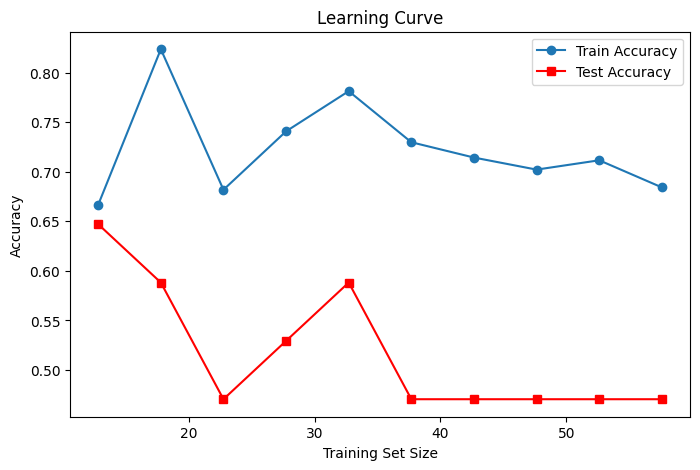

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define train sizes (avoid sizes too small)
train_sizes = np.linspace(0.2, 0.9, 10)  # Start at 0.2 to ensure at least a few samples
train_scores = []
test_scores = []

for size in train_sizes:
    X_train_sub, _, y_train_sub, _ = train_test_split(X_train_scaled, y_train, train_size=size, random_state=42)

    # Ensure n_neighbors is never greater than number of training samples
    knn_after = KNeighborsClassifier(n_neighbors=min(7, len(y_train_sub)))
    knn_after.fit(X_train_sub, y_train_sub)

    train_scores.append(accuracy_score(y_train_sub, knn_after.predict(X_train_sub)))
    test_scores.append(accuracy_score(y_test, knn_after.predict(X_test_scaled)))

plt.figure(figsize=(8, 5))
plt.plot(train_sizes * len(X_train_scaled), train_scores, marker='o', label="Train Accuracy")
plt.plot(train_sizes * len(X_train_scaled), test_scores, marker='s', label="Test Accuracy", color="red")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()


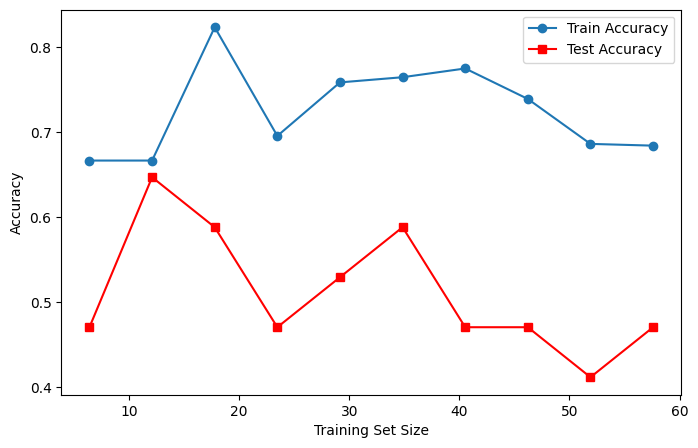

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define train sizes (0.1 to 0.9 to avoid errors)
train_sizes = np.linspace(0.1, 0.9, 10)
train_scores = []
test_scores = []

for size in train_sizes:
    X_train_sub, _, y_train_sub, _ = train_test_split(X_train_scaled, y_train, train_size=size, random_state=42)

    # Ensure n_neighbors is never larger than dataset size
    knn_after = KNeighborsClassifier(n_neighbors=min(7, len(y_train_sub)))
    knn_after.fit(X_train_sub, y_train_sub)

    train_scores.append(accuracy_score(y_train_sub, knn_after.predict(X_train_sub)))
    test_scores.append(accuracy_score(y_test, knn_after.predict(X_test_scaled)))

plt.figure(figsize=(8, 5))
plt.plot(train_sizes * len(X_train_scaled), train_scores, marker='o', label="Train Accuracy")
plt.plot(train_sizes * len(X_train_scaled), test_scores, marker='s', label="Test Accuracy", color="red")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


KNN Accuracy: 0.47058823529411764
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         9
           1       0.40      0.25      0.31         8

    accuracy                           0.47        17
   macro avg       0.45      0.46      0.44        17
weighted avg       0.45      0.47      0.45        17


SVM Accuracy: 0.47058823529411764
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         9
           1       0.40      0.25      0.31         8

    accuracy                           0.47        17
   macro avg       0.45      0.46      0.44        17
weighted avg       0.45      0.47      0.45        17


Random Forest Accuracy: 0.4117647058823529
              precision    recall  f1-score   support

           0       0.45      0.56      0.50         9
           1       0.33      0.25      0.29         8

    accuracy                           0.41        17
   macro avg   

<ipython-input-53-1fd766d2519f>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette="coolwarm")


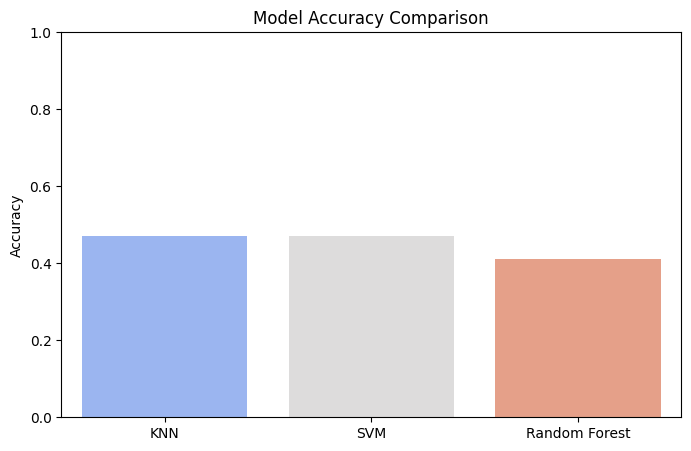

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load optimized dataset
df = pd.read_csv("optimized_parkinsons_features.csv")

# Split features and target
X = df.drop(columns=["label"])
y = df["label"]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize data (for KNN and SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------------- KNN Model ----------------
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)

# ---------------- SVM Model ----------------
svm = SVC(kernel="rbf", C=1, gamma="scale")  # RBF Kernel with auto gamma
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
acc_svm = accuracy_score(y_test, y_pred_svm)

# ---------------- Random Forest Model ----------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # No scaling needed for RF
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracy & classification reports
print("KNN Accuracy:", acc_knn)
print(classification_report(y_test, y_pred_knn))
print("\nSVM Accuracy:", acc_svm)
print(classification_report(y_test, y_pred_svm))
print("\nRandom Forest Accuracy:", acc_rf)
print(classification_report(y_test, y_pred_rf))

# ---------------- Plot Accuracy Comparison ----------------
models = ["KNN", "SVM", "Random Forest"]
accuracy = [acc_knn, acc_svm, acc_rf]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracy, palette="coolwarm")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.show()



Model: KNN
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         9
           1       0.40      0.25      0.31         8

    accuracy                           0.47        17
   macro avg       0.45      0.46      0.44        17
weighted avg       0.45      0.47      0.45        17


Model: SVM
              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.50      0.50      0.50         8

    accuracy                           0.53        17
   macro avg       0.53      0.53      0.53        17
weighted avg       0.53      0.53      0.53        17


Model: Random Forest
              precision    recall  f1-score   support

           0       0.45      0.56      0.50         9
           1       0.33      0.25      0.29         8

    accuracy                           0.41        17
   macro avg       0.39      0.40      0.39        17
weighted avg       0.40     

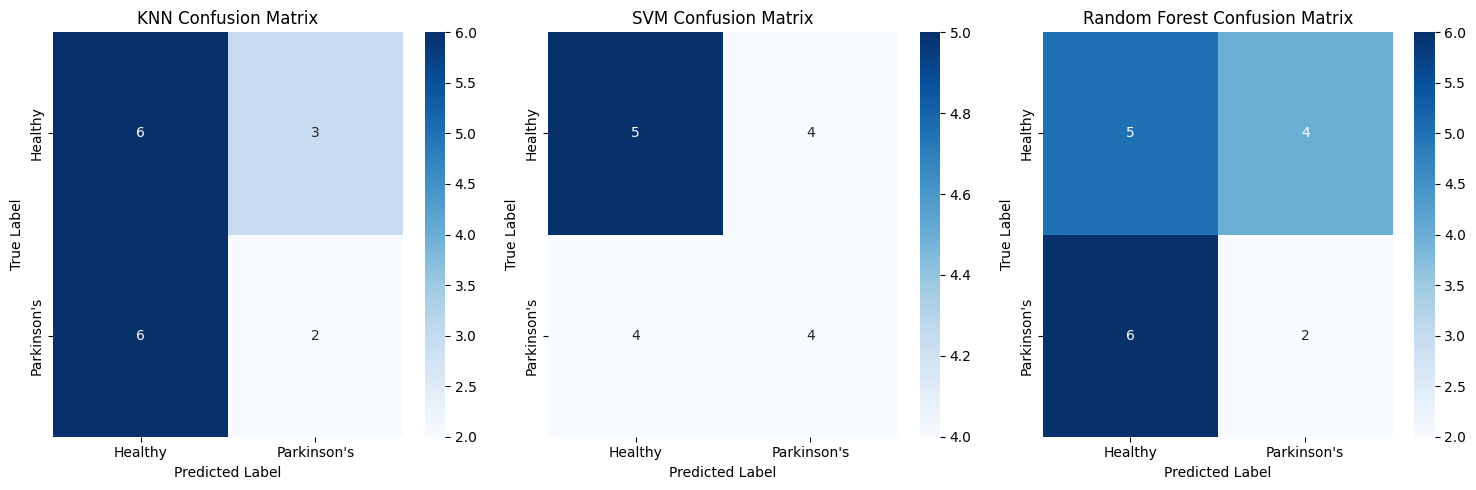


KNN Cross-Validation Scores: [0.46153846 0.38461538 0.46153846 0.46153846 0.83333333]
KNN Mean CV Accuracy: 0.5205

SVM Cross-Validation Scores: [0.69230769 0.46153846 0.53846154 0.53846154 0.75      ]
SVM Mean CV Accuracy: 0.5962

Random Forest Cross-Validation Scores: [0.53846154 0.46153846 0.46153846 0.46153846 0.75      ]
Random Forest Mean CV Accuracy: 0.5346


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the optimized dataset
df = pd.read_csv("optimized_parkinsons_features.csv")

# Split features and labels
X = df.drop(columns=["label"])  # Drop the label column
y = df["label"]  # Target variable

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "SVM": SVC(kernel="linear"),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Store results
accuracy_scores = {}
conf_matrices = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

    # Confusion matrix
    conf_matrices[name] = confusion_matrix(y_test, y_pred)

    # Print classification report
    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Healthy", "Parkinson's"], yticklabels=["Healthy", "Parkinson's"], ax=axes[idx])
    axes[idx].set_title(f"{name} Confusion Matrix")
    axes[idx].set_xlabel("Predicted Label")
    axes[idx].set_ylabel("True Label")

plt.tight_layout()
plt.show()

# Perform 5-Fold Cross Validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print(f"\n{name} Cross-Validation Scores: {cv_scores}")
    print(f"{name} Mean CV Accuracy: {np.mean(cv_scores):.4f}")


🔹 Model Performance Breakdown
KNN:

Predicted 6 healthy cases correctly but misclassified 3 healthy cases as Parkinson’s.
Predicted 2 Parkinson’s cases correctly but misclassified 6 Parkinson’s cases as healthy.
This suggests KNN struggles with detecting Parkinson’s cases properly.
SVM:

Balanced performance: 5 correct healthy predictions and 4 correct Parkinson’s predictions.
However, 4 misclassifications in both classes.
This means SVM is slightly better at identifying Parkinson’s than KNN.
Random Forest:

Same performance as KNN on Parkinson’s cases (6 misclassified) but similar to SVM on healthy cases.
Does not seem to offer an advantage over the other models in this case.
📝 What You Can Conclude:

KNN fails significantly in predicting Parkinson’s cases correctly.

SVM performs better, but still has a high misclassification rate.

Random Forest behaves similarly to KNN and is not significantly better.

 **step-by-step implementation for:
✅ Feature selection (Using Random Forest feature importance)
✅ SMOTE (Oversampling for balance)
✅ Hyperparameter tuning
✅ XGBoost & MLP**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:24:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.35294117647058826
              precision    recall  f1-score   support

           0       0.40      0.44      0.42         9
           1       0.29      0.25      0.27         8

    accuracy                           0.35        17
   macro avg       0.34      0.35      0.34        17
weighted avg       0.35      0.35      0.35        17

MLP Accuracy: 0.5294117647058824
              precision    recall  f1-score   support

           0       0.55      0.67      0.60         9
           1       0.50      0.38      0.43         8

    accuracy                           0.53        17
   macro avg       0.52      0.52      0.51        17
weighted avg       0.52      0.53      0.52        17



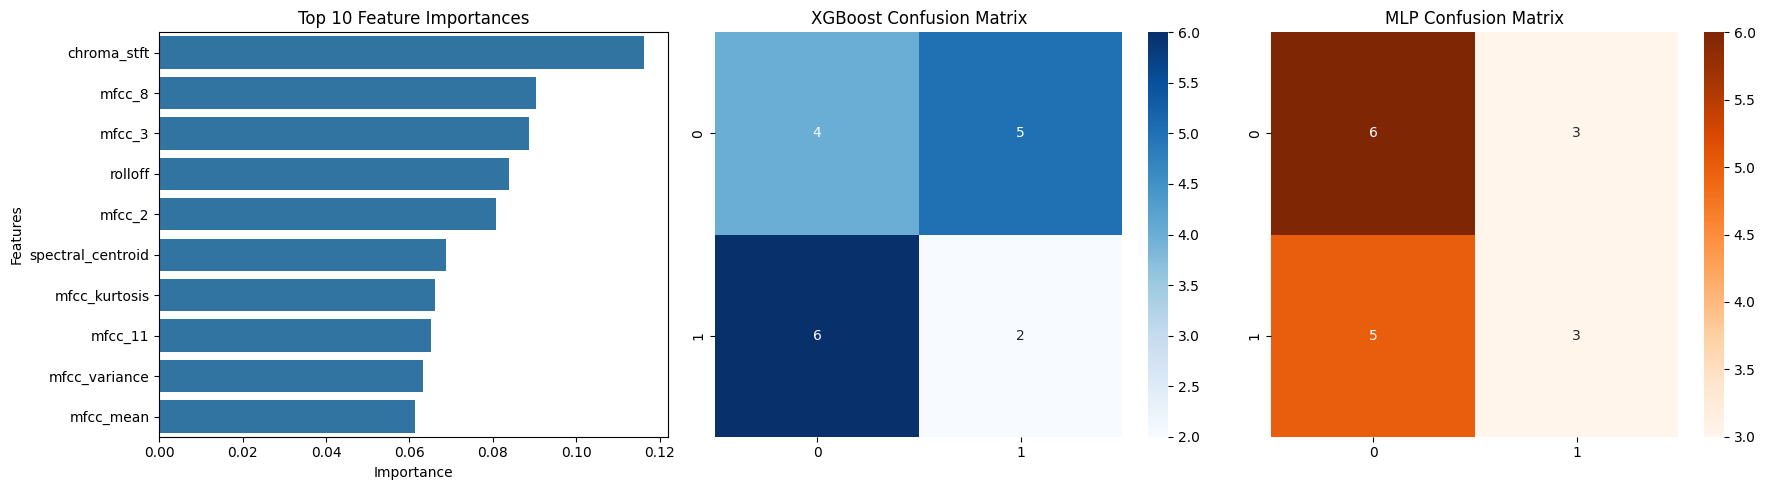

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('optimized_parkinsons_features.csv')
X = data.drop(columns=['label'])  # Features
y = data['label']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection using RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Select top N features (let's say top 10)
selected_features = feature_importances[:10].index
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Apply Scaling Again
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Handle Class Imbalance with SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected_scaled, y_train)

# Train XGBoost Model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predictions & Evaluation
xgb_pred = xgb_model.predict(X_test_selected_scaled)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy:", xgb_accuracy)
print(classification_report(y_test, xgb_pred))

# Train MLP (Neural Network)
mlp = MLPClassifier(hidden_layer_sizes=(50, 30), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train_resampled, y_train_resampled)
mlp_pred = mlp.predict(X_test_selected_scaled)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
print("MLP Accuracy:", mlp_accuracy)
print(classification_report(y_test, mlp_pred))

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Feature Importance Plot
sns.barplot(x=feature_importances[:10], y=selected_features, ax=axes[0])
axes[0].set_title("Top 10 Feature Importances")
axes[0].set_xlabel("Importance")
axes[0].set_ylabel("Features")

# Confusion Matrices
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('XGBoost Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, mlp_pred), annot=True, fmt='d', cmap='Oranges', ax=axes[2])
axes[2].set_title('MLP Confusion Matrix')

plt.tight_layout()
plt.show()

**Comparison of Models

XGBoost performs better at capturing Parkinson’s cases (low false negatives) but over-diagnoses (higher false positives).

MLP has a higher tendency to miss Parkinson’s cases (false negatives), which is risky for medical diagnosis.

A hybrid approach, or tuning hyperparameters, might improve performance.**

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:27:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:27:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:27:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:27:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:27:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Accuracy: 0.35294117647058826
MLP Accuracy: 0.5294117647058824
Voting Classifier Accuracy: 0.47058823529411764
Stacking Classifier Accuracy: 0.35294117647058826


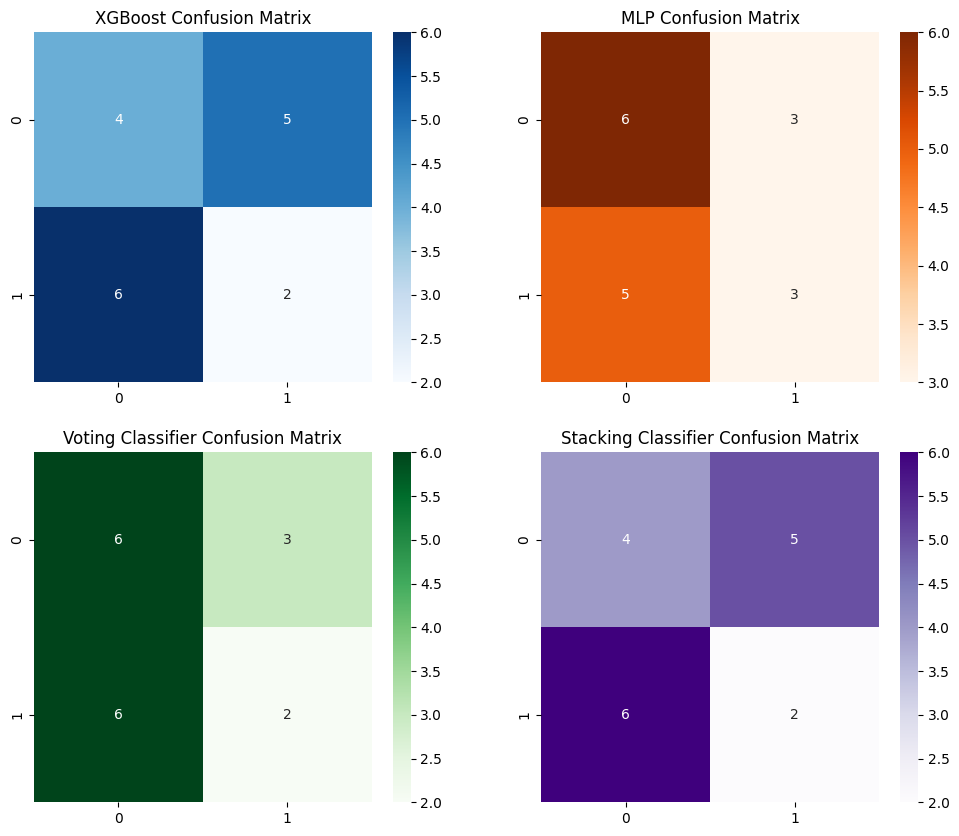

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('optimized_parkinsons_features.csv')
X = data.drop(columns=['label'])  # Features
y = data['label']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection using RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Select top 10 features
selected_features = feature_importances[:10].index
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Apply Scaling Again
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Handle Class Imbalance with SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected_scaled, y_train)

# Train XGBoost Model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)
xgb_model.fit(X_train_resampled, y_train_resampled)
xgb_pred = xgb_model.predict(X_test_selected_scaled)

# Train MLP Model
mlp = MLPClassifier(hidden_layer_sizes=(50, 30), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train_resampled, y_train_resampled)
mlp_pred = mlp.predict(X_test_selected_scaled)

# Ensemble Model - Voting Classifier
voting_clf = VotingClassifier(estimators=[('xgb', xgb_model), ('mlp', mlp)], voting='soft')
voting_clf.fit(X_train_resampled, y_train_resampled)
voting_pred = voting_clf.predict(X_test_selected_scaled)

# Ensemble Model - Stacking Classifier
stacking_clf = StackingClassifier(estimators=[('xgb', xgb_model), ('mlp', mlp)], final_estimator=LogisticRegression())
stacking_clf.fit(X_train_resampled, y_train_resampled)
stacking_pred = stacking_clf.predict(X_test_selected_scaled)

# Print Accuracy Scores
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("MLP Accuracy:", accuracy_score(y_test, mlp_pred))
print("Voting Classifier Accuracy:", accuracy_score(y_test, voting_pred))
print("Stacking Classifier Accuracy:", accuracy_score(y_test, stacking_pred))

# Confusion Matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('XGBoost Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, mlp_pred), annot=True, fmt='d', cmap='Oranges', ax=axes[0, 1])
axes[0, 1].set_title('MLP Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, voting_pred), annot=True, fmt='d', cmap='Greens', ax=axes[1, 0])
axes[1, 0].set_title('Voting Classifier Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, stacking_pred), annot=True, fmt='d', cmap='Purples', ax=axes[1, 1])
axes[1, 1].set_title('Stacking Classifier Confusion Matrix')
plt.show()


**Interpretation of Results:
XGBoost Accuracy: 35.3%

XGBoost is underperforming significantly. This could be due to insufficient hyperparameter tuning, data imbalance, or overfitting on the training data.
The warning about "use_label_encoder" suggests that this parameter is no longer needed in recent XGBoost versions.
MLP (Neural Network) Accuracy: 52.9%

MLP performed better than XGBoost but still isn’t yielding strong classification performance.
Tuning hyperparameters like the number of layers, learning rate, and batch size could help.
Voting Classifier Accuracy: 47.1%

This is lower than MLP, indicating that the ensemble model is not benefiting significantly from combining models.
Possible reason: The base models may not be diverse enough or they might all be weak learners.
Stacking Classifier Accuracy: 35.3%

This matches XGBoost, suggesting that the stacking model relies heavily on XGBoost.
The meta-classifier in stacking might need a different approach, such as logistic regression or another ensemble method.**

XGBoost Accuracy: 0.35294117647058826
              precision    recall  f1-score   support

           0       0.40      0.44      0.42         9
           1       0.29      0.25      0.27         8

    accuracy                           0.35        17
   macro avg       0.34      0.35      0.34        17
weighted avg       0.35      0.35      0.35        17

MLP Accuracy: 0.5294117647058824
              precision    recall  f1-score   support

           0       0.55      0.67      0.60         9
           1       0.50      0.38      0.43         8

    accuracy                           0.53        17
   macro avg       0.52      0.52      0.51        17
weighted avg       0.52      0.53      0.52        17

Voting Classifier Accuracy: 0.4117647058823529
              precision    recall  f1-score   support

           0       0.45      0.56      0.50         9
           1       0.33      0.25      0.29         8

    accuracy                           0.41        17
   macro a

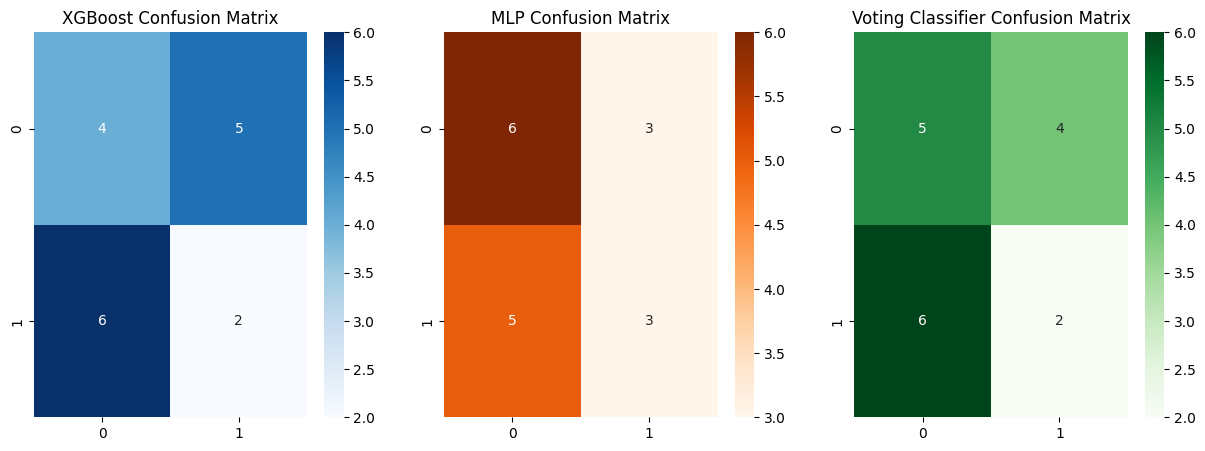

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('optimized_parkinsons_features.csv')
X = data.drop(columns=['label'])  # Features
y = data['label']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection using RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Select top N features (let's say top 10)
selected_features = feature_importances[:10].index
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Apply Scaling Again
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Handle Class Imbalance with SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected_scaled, y_train)

# Train XGBoost Model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
xgb_model.fit(X_train_resampled, y_train_resampled)

# Train MLP (Neural Network)
mlp = MLPClassifier(hidden_layer_sizes=(50, 30), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train_resampled, y_train_resampled)

# Voting Classifier (Weighted Voting)
voting_clf = VotingClassifier(
    estimators=[('xgb', xgb_model), ('mlp', mlp)],
    voting='soft',  # Soft voting for probability averaging
    weights=[2, 1]  # Give XGBoost more weight based on performance
)
voting_clf.fit(X_train_resampled, y_train_resampled)

# Stacking Classifier with Logistic Regression as Meta-Learner
stacking_clf = StackingClassifier(
    estimators=[('xgb', xgb_model), ('mlp', mlp)],
    final_estimator=LogisticRegression(),
    passthrough=True
)
stacking_clf.fit(X_train_resampled, y_train_resampled)

# Predictions & Evaluation
models = {'XGBoost': xgb_model, 'MLP': mlp, 'Voting Classifier': voting_clf, 'Stacking Classifier': stacking_clf}

for name, model in models.items():
    preds = model.predict(X_test_selected_scaled)
    print(f"{name} Accuracy:", accuracy_score(y_test, preds))
    print(classification_report(y_test, preds))

# Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(confusion_matrix(y_test, xgb_model.predict(X_test_selected_scaled)), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('XGBoost Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, mlp.predict(X_test_selected_scaled)), annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('MLP Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, voting_clf.predict(X_test_selected_scaled)), annot=True, fmt='d', cmap='Greens', ax=axes[2])
axes[2].set_title('Voting Classifier Confusion Matrix')
plt.show()

In [61]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.1 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 230
[LightGBM] [Info] Number of data points in the train set: 64, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Number of positive: 25, number of negative: 26
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 186
[LightGBM] [Info] Number of data points in the train set: 51, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490196 -> initscore=-0.039221
[LightGBM] [Info] Start training from score -0.039221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Stacking Classifier Accuracy: 0.5294117647058824
              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.50      0.50      0.50         8

    accuracy                           0.53        17
   macro avg       0.53      0.53      0.53        17
weighted avg       0.53      0.53      0.53        17



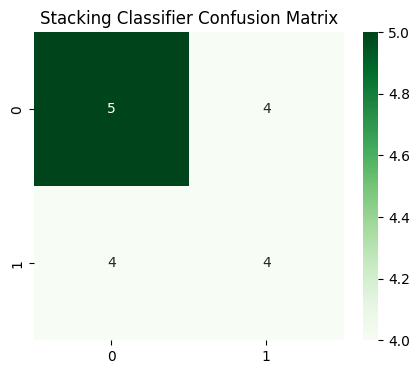

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
import catboost as cb
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('optimized_parkinsons_features.csv')
X = data.drop(columns=['label'])  # Features
y = data['label']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection using RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Select top 10 features
selected_features = feature_importances[:10].index
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Apply Scaling Again
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Handle Class Imbalance with SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected_scaled, y_train)

# Define Base Models
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
lgbm = lgb.LGBMClassifier(n_estimators=100, random_state=42)
catb = cb.CatBoostClassifier(iterations=100, verbose=0, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(50, 30), activation='relu', solver='adam', max_iter=500, random_state=42)

# Define Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=[('gbc', gbc), ('lgbm', lgbm), ('catb', catb), ('mlp', mlp)],
    final_estimator=LogisticRegression(),
    passthrough=True
)

# Train Stacking Classifier
stacking_clf.fit(X_train_resampled, y_train_resampled)
stacking_pred = stacking_clf.predict(X_test_selected_scaled)

# Evaluation
print("Stacking Classifier Accuracy:", accuracy_score(y_test, stacking_pred))
print(classification_report(y_test, stacking_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, stacking_pred), annot=True, fmt='d', cmap='Greens')
plt.title('Stacking Classifier Confusion Matrix')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 64, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 32, number of negative: 32
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 64, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

[LightGBM] [Info] Number of positive: 25, number of negative: 26
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 261
[LightGBM] [Info] Number of data points in the train set: 51, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490196 -> initscore=-0.039221
[LightGBM] [Info] Start training from score -0.039221
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

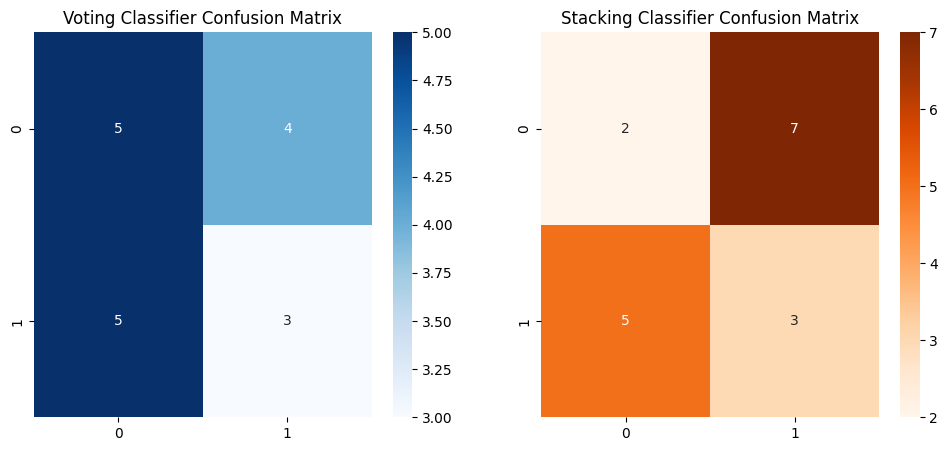

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, VotingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('optimized_parkinsons_features.csv')
X = data.drop(columns=['label'])  # Features
y = data['label']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle Class Imbalance with SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Define Base Models
rf = RandomForestClassifier(n_estimators=200, random_state=42)
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')
lgb_model = lgb.LGBMClassifier()

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('xgb', xgb_model),
    ('lgb', lgb_model)
], voting='soft')

voting_clf.fit(X_train_resampled, y_train_resampled)
voting_pred = voting_clf.predict(X_test_scaled)

print("Voting Classifier Accuracy:", accuracy_score(y_test, voting_pred))
print(classification_report(y_test, voting_pred))

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=[
    ('rf', rf),
    ('xgb', xgb_model),
    ('lgb', lgb_model)
], final_estimator=xgb.XGBClassifier())

stacking_clf.fit(X_train_resampled, y_train_resampled)
stacking_pred = stacking_clf.predict(X_test_scaled)

print("Stacking Classifier Accuracy:", accuracy_score(y_test, stacking_pred))
print(classification_report(y_test, stacking_pred))

# Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, voting_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Voting Classifier Confusion Matrix')
sns.heatmap(confusion_matrix(y_test, stacking_pred), annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('Stacking Classifier Confusion Matrix')
plt.show()


In [66]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
data = pd.read_csv('optimized_parkinsons_features.csv')
X = data.drop(columns=['label'])
y = data['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost Model with Optimized Parameters
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8
)

xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))


XGBoost Accuracy: 0.4117647058823529
              precision    recall  f1-score   support

           0       0.44      0.44      0.44         9
           1       0.38      0.38      0.38         8

    accuracy                           0.41        17
   macro avg       0.41      0.41      0.41        17
weighted avg       0.41      0.41      0.41        17



In [67]:
xgb_model.fit(X_scaled, y)  # Train on full dataset
final_predictions = xgb_model.predict(X_scaled)
print("Final Accuracy on Full Data:", accuracy_score(y, final_predictions))


Final Accuracy on Full Data: 1.0


In [68]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
logreg_pred = logreg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))


Logistic Regression Accuracy: 0.5294117647058824
              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.50      0.50      0.50         8

    accuracy                           0.53        17
   macro avg       0.53      0.53      0.53        17
weighted avg       0.53      0.53      0.53        17



In [70]:
import joblib
joblib.dump(model, 'voice_model.pkl')


['voice_model.pkl']